In [1]:
%load_ext autoreload


In [2]:
%autoreload 2

In [9]:
import raw.readingfiles as readfiles
from models.ANN import ANN
from models.ngrams import Ngrams
from util import evaluate, evaluate_ANN, k_fold
from matplotlib import pyplot as plt
import importlib, pickle
import numpy as np


In [4]:
data_set = k_fold(10, 'training_data.csv')

## N-gram Model

### Parameter Tweaking

In [27]:
performance = []
for n in range(2,11):
    ngrams_model = Ngrams(n)
    accuracy, perplexity = evaluate(ngrams_model,
                                    data_set[0].training_set,
                                    data_set[0].validation_set)
    performance.append([n,accuracy,perplexity])
    print([n,accuracy,perplexity])

[2, 0.1152, 22951.48523320898]
[3, 0.1764, 143521.12084669698]
[4, 0.1764, 431622.7995401067]
[5, 0.1252, 710802.9769312381]
[6, 0.0828, 868000.7112089177]
[7, 0.0568, 940000.2132040319]
[8, 0.042, 970400.0960488445]
[9, 0.038, 979200.0440359877]
[10, 0.0344, 984800.0279772903]


[[2.00000000e+00 1.15200000e-01 2.29514852e+04]
 [3.00000000e+00 1.76400000e-01 1.43521121e+05]
 [4.00000000e+00 1.76400000e-01 4.31622800e+05]
 [5.00000000e+00 1.25200000e-01 7.10802977e+05]
 [6.00000000e+00 8.28000000e-02 8.68000711e+05]
 [7.00000000e+00 5.68000000e-02 9.40000213e+05]
 [8.00000000e+00 4.20000000e-02 9.70400096e+05]
 [9.00000000e+00 3.80000000e-02 9.79200044e+05]
 [1.00000000e+01 3.44000000e-02 9.84800028e+05]]


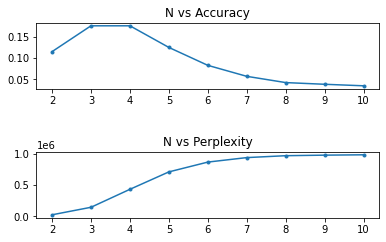

In [28]:
figure = plt.figure()
new_per = np.asarray(performance)
print(new_per)
plt.subplot(211)
plt.plot(new_per[:,0],new_per[:,1],".-")
plt.title('N vs Accuracy')
plt.subplot(212)
plt.plot(new_per[:,0],new_per[:,2],".-")
plt.title('N vs Perplexity')
figure.tight_layout(pad=3.0)
plt.show()

## Artificial Neural Network

### Parameter Tweaking

[[5.00000000e+00 5.73065903e-02 1.98017910e+08]
 [1.00000000e+01 2.21039705e-02 1.26833888e+31]
 [1.50000000e+01 3.56119525e-02 1.93074032e+27]
 [2.50000000e+01 1.51453131e-02 5.12679297e+33]
 [5.00000000e+01 1.96479738e-02            inf]]


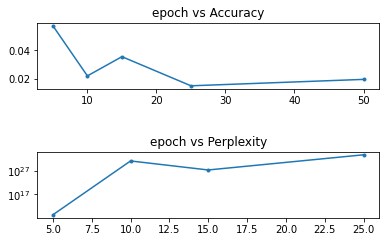

In [24]:
with open('ANN_performance.pkl', 'rb') as f:
    performance_ANN = pickle.load(f)
figure = plt.figure()
new_per = np.asarray(performance_ANN)
print(new_per)
plt.subplot(211)
plt.plot(new_per[:,0],new_per[:,1],".-")
plt.title('epoch vs Accuracy')
plt.subplot(212)
plt.plot(new_per[:,0],new_per[:,2],".-")
plt.title('epoch vs Perplexity')
plt.yscale('log')
figure.tight_layout(pad=3.0)
plt.show()

[[1.00000000e-03 5.73065903e-02 7.33933379e+08]
 [1.00000000e-02 2.70159640e-02 1.03718448e+14]
 [1.00000000e-01 5.73065903e-02 2.11289874e+05]
 [5.00000000e-01 5.73065903e-02 3.35613620e+06]
 [1.00000000e+00 5.73065903e-02 8.47339705e+06]
 [2.00000000e+00 5.73065903e-02 2.76405689e+07]]


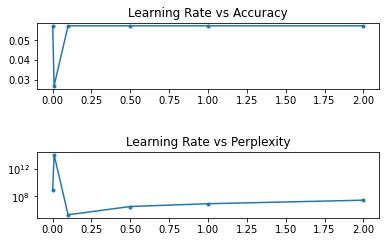

In [40]:
with open('ANN_performance_lr.pkl', 'rb') as f:
    performance_ANN = pickle.load(f)
figure = plt.figure()
new_per = np.asarray(performance_ANN)
print(new_per)
plt.subplot(211)
plt.plot(new_per[:,0],new_per[:,1],".-")
plt.title('Learning Rate vs Accuracy')
plt.subplot(212)
plt.plot(new_per[:,0],new_per[:,2],".-")
plt.title('Learning Rate vs Perplexity')
plt.yscale('log')
figure.tight_layout(pad=3.0)
plt.show()

[[2.00000000e+03 2.70159640e-02 9.29833458e+04]
 [1.50000000e+03 5.73065903e-02 1.47530637e+05]
 [1.00000000e+03 5.73065903e-02 2.69022522e+05]
 [7.50000000e+02 5.73065903e-02 3.21751575e+05]
 [5.00000000e+02 5.73065903e-02 5.12398466e+05]]


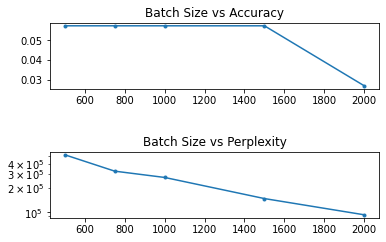

In [41]:
with open('ANN_performance_bs.pkl', 'rb') as f:
    performance_ANN = pickle.load(f)
figure = plt.figure()
new_per = np.asarray(performance_ANN)
print(new_per)
plt.subplot(211)
plt.plot(new_per[:,0],new_per[:,1],".-")
plt.title('Batch Size vs Accuracy')
plt.subplot(212)
plt.plot(new_per[:,0],new_per[:,2],".-")
plt.title('Batch Size vs Perplexity')
plt.yscale('log')
figure.tight_layout(pad=3.0)
plt.show()

### ANN k-fold

In [45]:
accuracy = [0.02128530495292673,0.011817440912795437,0.029062627916496112,0.02788027880278803,
            0.0194884287454324,0.056309083436087135,0.02631578947368421,0.06293706293706294,
            0.03422680412371134,0.05731958762886598]
perplexity = [73299.1463468303,65960.48622290896,90486.15199367315,83860.15610447599,87989.51281525973,
              100521.63548793262,91452.24018215887,93633.75260227793,83302.36358922954,96384.798663453]

print(np.mean(accuracy))
print(np.mean(perplexity))

0.034664240892985025
86689.02440082


## Recurrent Neural Network

### Parameter Tweaking

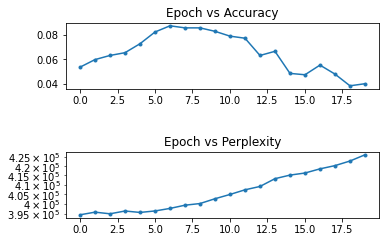

In [46]:
with open('RNN_performance_epoch_20_lr_0p001.pkl', 'rb') as f:
    RNN_performance_epoch_vs_acc = pickle.load(f)
RNN_performance_epoch_vs_acc = np.array(RNN_performance_epoch_vs_acc)
figure = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(RNN_performance_epoch_vs_acc[:,0],RNN_performance_epoch_vs_acc[:,3],".-", label="Test Accuracy")
plt.title('Epoch vs Accuracy')
plt.subplot(2, 1, 2)
plt.plot(RNN_performance_epoch_vs_acc[:,0],RNN_performance_epoch_vs_acc[:,4],".-", label="Test Perplexity")
plt.title('Epoch vs Perplexity')
plt.yscale('log')
figure.tight_layout(pad=3.0)
plt.show()

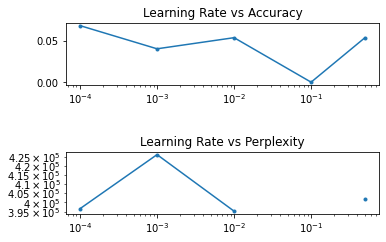

In [47]:
with open('RNN_performance_lr.pkl', 'rb') as f:
    RNN_performance_lr_vs_acc = pickle.load(f)

RNN_performance_lr_vs_acc = np.array(RNN_performance_lr_vs_acc)
figure = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(RNN_performance_lr_vs_acc[:,0],RNN_performance_lr_vs_acc[:,3],".-", label="Test Accuracy")
plt.xscale('log')
plt.title('Learning Rate vs Accuracy')
plt.subplot(2, 1, 2)
plt.plot(RNN_performance_lr_vs_acc[:,0],RNN_performance_lr_vs_acc[:,4],".-", label="Test Perplexity")
plt.title('Learning Rate vs Perplexity')
plt.yscale('log')
plt.xscale('log')
figure.tight_layout(pad=3.0)
plt.show()

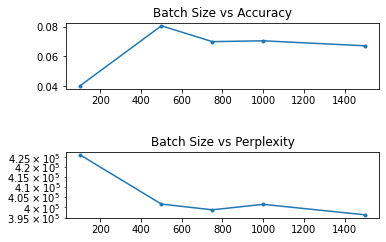

In [48]:
with open('RNN_performance_batch.pkl', 'rb') as f:
    RNN_performance_lr_vs_acc = pickle.load(f)

RNN_performance_lr_vs_acc = np.array(RNN_performance_lr_vs_acc)
figure = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(RNN_performance_lr_vs_acc[:,0],RNN_performance_lr_vs_acc[:,3],".-", label="Test Accuracy")
plt.title('Batch Size vs Accuracy')
plt.subplot(2, 1, 2)
plt.plot(RNN_performance_lr_vs_acc[:,0],RNN_performance_lr_vs_acc[:,4],".-", label="Test Perplexity")
plt.title('Batch Size vs Perplexity')
plt.yscale('log')
figure.tight_layout(pad=3.0)
plt.show()

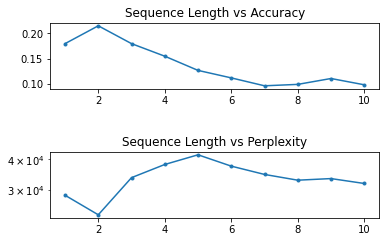

In [49]:
with open('RNN_performance_seqlen.pkl', 'rb') as f:
    RNN_performance_seqlen = pickle.load(f)

RNN_performance_seqlen = np.array(RNN_performance_seqlen)
figure = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(RNN_performance_seqlen[:,0],RNN_performance_seqlen[:,3],".-", label="Test Accuracy")
plt.title('Sequence Length vs Accuracy')
plt.subplot(2, 1, 2)
plt.plot(RNN_performance_seqlen[:,0],RNN_performance_seqlen[:,4],".-", label="Test Perplexity")
plt.title('Sequence Length vs Perplexity')
plt.yscale('log')
figure.tight_layout(pad=3.0)
plt.show()

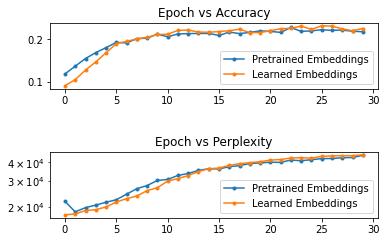

In [50]:
with open('RNN_performance_epochs.pkl', 'rb') as f:
    RNN_performance = pickle.load(f)

with open('RNN_performance_epochs_ef.pkl', 'rb') as f:
    RNN_performance_ef = pickle.load(f)

RNN_performance = np.array(RNN_performance)
RNN_performance_ef = np.array(RNN_performance_ef)
figure = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(RNN_performance[:,0],RNN_performance[:,3],".-", label="Pretrained Embeddings")
plt.plot(RNN_performance_ef[:,0],RNN_performance_ef[:,3],".-", label="Learned Embeddings")
plt.legend()
plt.title('Epoch vs Accuracy')
plt.subplot(2, 1, 2)
plt.plot(RNN_performance[:,0],RNN_performance[:,4],".-", label="Pretrained Embeddings")
plt.plot(RNN_performance_ef[:,0],RNN_performance_ef[:,4],".-", label="Learned Embeddings")
plt.title('Epoch vs Perplexity')
plt.yscale('log')
plt.legend()
figure.tight_layout(pad=3.0)
plt.show()